## EXPLORATORY DATA ANALYSIS ON A DATASET

## Tasks:

## 1.	Data Cleaning and Preparation:

●	Load the dataset into a data frame or equivalent data structure.

●	Handle missing values appropriately (e.g., imputation, deletion).

●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

●	Detect and treat outliers if necessary.


In [1]:
import pandas as pd
data=pd.read_csv('Cardiotocographic.csv')

In [2]:
df=pd.DataFrame(data)

In [3]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [4]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [5]:
df.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2105 non-null   float64
 2   FM        2105 non-null   float64
 3   UC        2105 non-null   float64
 4   DL        2105 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2105 non-null   float64
 8   MSTV      2105 non-null   float64
 9   ALTV      2105 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 246.7 KB


In [9]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [13]:
for col_name in df.columns:
    Q1=df[col_name].quantile(.25)
    Q3=df[col_name].quantile(.75)
    iqr=Q3-Q1
    
    upper_extreme=Q3+(1.5*iqr)
    lower_extreme=Q1-(1.5*iqr)
    
    outlier=df[(df[col_name]<lower_extreme)|(df[col_name]>upper_extreme)]
    
    print('\n\n',col_name)
    print('Upper Extreme',upper_extreme)
    print('Lower Extreme',lower_extreme)
    print('Outlier',len(outlier))



 LB
Upper Extreme 161.0
Lower Extreme 105.0
Outlier 10


 AC
Upper Extreme 0.014124295
Lower Extreme -0.008474577
Outlier 39


 FM
Upper Extreme 0.006385695
Lower Extreme -0.003831417
Outlier 343


 UC
Upper Extreme 0.0135828835
Lower Extreme -0.005208944500000001
Outlier 13


 DL
Upper Extreme 0.008223685
Lower Extreme -0.004934211
Outlier 124


 DS
Upper Extreme 0.0
Lower Extreme 0.0
Outlier 120


 DP
Upper Extreme 0.0
Lower Extreme 0.0
Outlier 284


 ASTV
Upper Extreme 104.5
Lower Extreme -11.5
Outlier 10


 MSTV
Upper Extreme 3.2
Lower Extreme -0.8
Outlier 78


 ALTV
Upper Extreme 27.5
Lower Extreme -16.5
Outlier 317


 MLTV
Upper Extreme 20.35
Lower Extreme -4.850000000000001
Outlier 81


 Width
Upper Extreme 194.5
Lower Extreme -57.5
Outlier 10


 Tendency
Upper Extreme 2.5
Lower Extreme -1.5
Outlier 10


 NSP
Upper Extreme 1.0
Lower Extreme 1.0
Outlier 559


In [61]:
def outlier(df,col):
    
    q1=df[col].quantile(.25)
    q3=df[col].quantile(.75)
    iqr=q3-q1
    
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    
    return upper,lower

def replace(df):
    
    df1=df.copy()
    
    for col in df.columns:
        
        upper,lower=outlier(df,col)
        df1.loc[df1[col]>upper,col]=upper
        df1.loc[df1[col]<lower,col]=lower
        
    return df1

In [62]:
df1=replace(df)

for col in df.columns:
    
    q1=df1[col].quantile(.25)
    q3=df1[col].quantile(.75)
    iqr=q3-q1
    
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    
    outliers=df1[(df1[col]>upper)|(df1[col]<lower)]
    print(f"{col} : {len(outliers)}")

LB : 0
AC : 0
FM : 0
UC : 0
DL : 0
DS : 0
DP : 0
ASTV : 0
MSTV : 0
ALTV : 0
MLTV : 0
Width : 0
Tendency : 0
NSP : 0


## 2.	Statistical Summary:

●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

●	Highlight any interesting findings from this summary.


In [14]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [15]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003202,0.009963,0.004388,0.001892,0.000003,0.000175,46.996929,1.361006,10.353647,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004324,0.067870,0.003350,0.003348,0.000142,0.000840,18.847737,1.173164,21.282102,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002554,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [63]:
df1

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,27.5,2.40,64.0,0.999926,1.0
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.40,130.0,0.000000,1.0
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.40,130.0,0.000000,1.0
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,20.35,117.0,1.000000,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.90,117.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006386,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,7.20,40.0,0.000000,1.0
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.0,7.10,66.0,1.000000,1.0
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,6.10,67.0,1.000000,1.0
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,7.00,66.0,1.000000,1.0


In [64]:
df1.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.0,2105.0,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.0
mean,133.293227,0.003143,0.001561,0.004358,0.001768,0.0,0.0,46.982677,1.302006,6.727067,8.022202,70.319997,0.319695,1.0
std,9.979659,0.003843,0.002473,0.003008,0.002672,0.0,0.0,17.636431,0.779684,10.397529,5.094420,39.767619,0.624697,0.0
min,105.000000,-0.008475,-0.003831,-0.005209,-0.004934,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.850000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.0
75%,140.000000,0.005650,0.002554,0.006536,0.003289,0.0,0.0,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.0
max,161.000000,0.014124,0.006386,0.013583,0.008224,0.0,0.0,104.500000,3.200000,27.500000,20.350000,194.500000,2.500000,1.0


The Interesting Findings I got is

1. DS and DP has zero varience for all so we can drop these
2. The AC,FM,UC,ASTV,MSTV,ALTV,MLTV,Width and Tendancy has negative minimum values and LB only has positive minimum values this shows slight outliers but is is not that much it can be manageble and it is normal
3. NSP is constant for all(1.0 for all) ,It has no varience(std=0), We can't use NSP in supervised learning because it is not labelled

## 3.	Data Visualization:

●	Create histograms or boxplots to visualize the distributions of various numerical variables.

●	Use bar charts or pie charts to display the frequency of categories for categorical variables.

●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.


array([[<Axes: title={'center': 'LB'}>, <Axes: title={'center': 'AC'}>,
        <Axes: title={'center': 'FM'}>, <Axes: title={'center': 'UC'}>],
       [<Axes: title={'center': 'DL'}>, <Axes: title={'center': 'DS'}>,
        <Axes: title={'center': 'DP'}>, <Axes: title={'center': 'ASTV'}>],
       [<Axes: title={'center': 'MSTV'}>,
        <Axes: title={'center': 'ALTV'}>,
        <Axes: title={'center': 'MLTV'}>,
        <Axes: title={'center': 'Width'}>],
       [<Axes: title={'center': 'Tendency'}>,
        <Axes: title={'center': 'NSP'}>, <Axes: >, <Axes: >]],
      dtype=object)

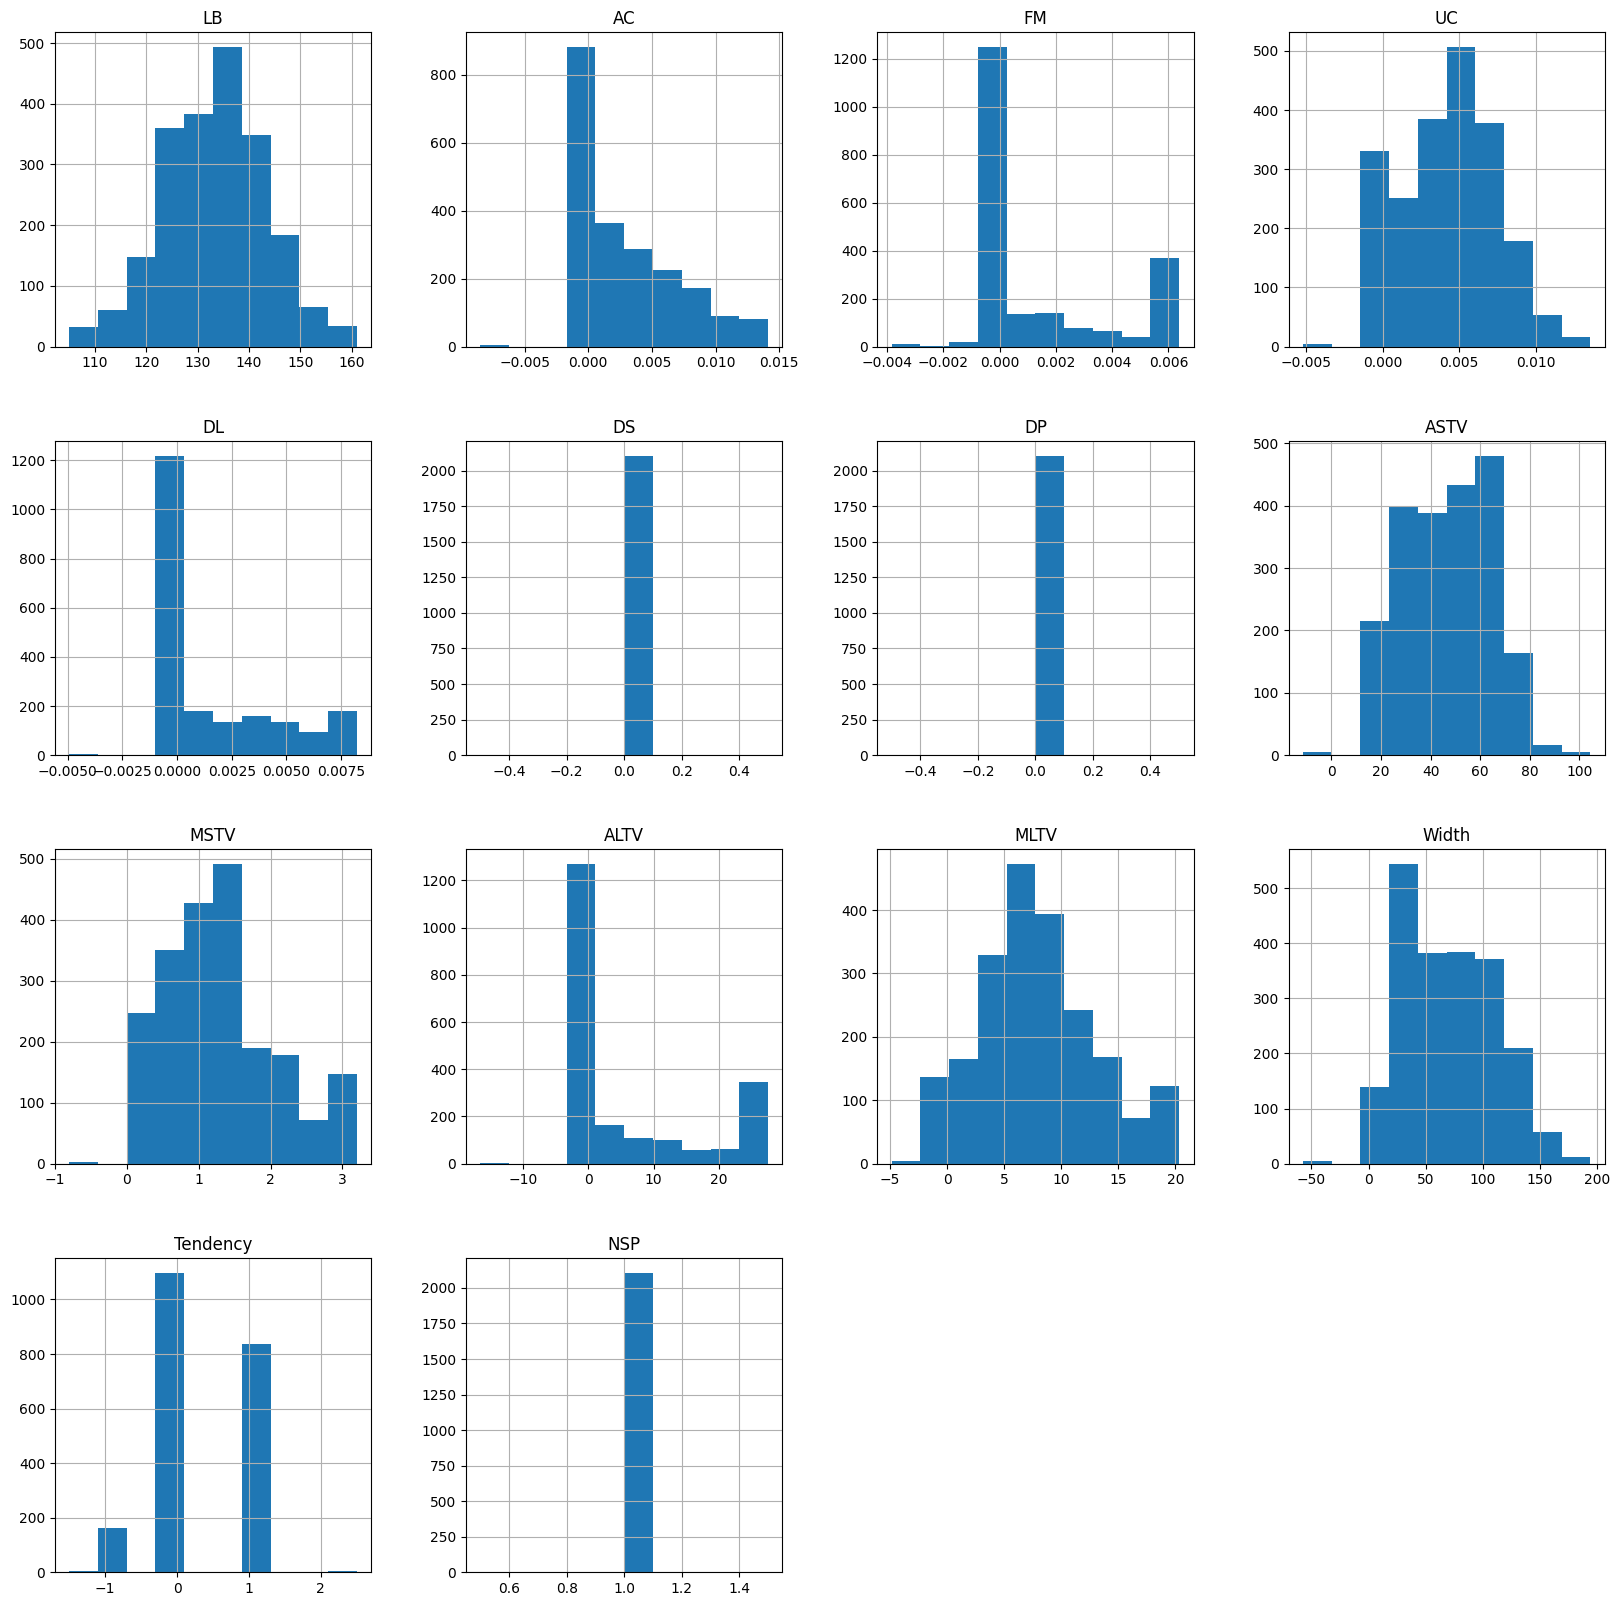

In [65]:
df1.hist(figsize=(20,20))

This is showing Histogram of all columns

<Axes: >

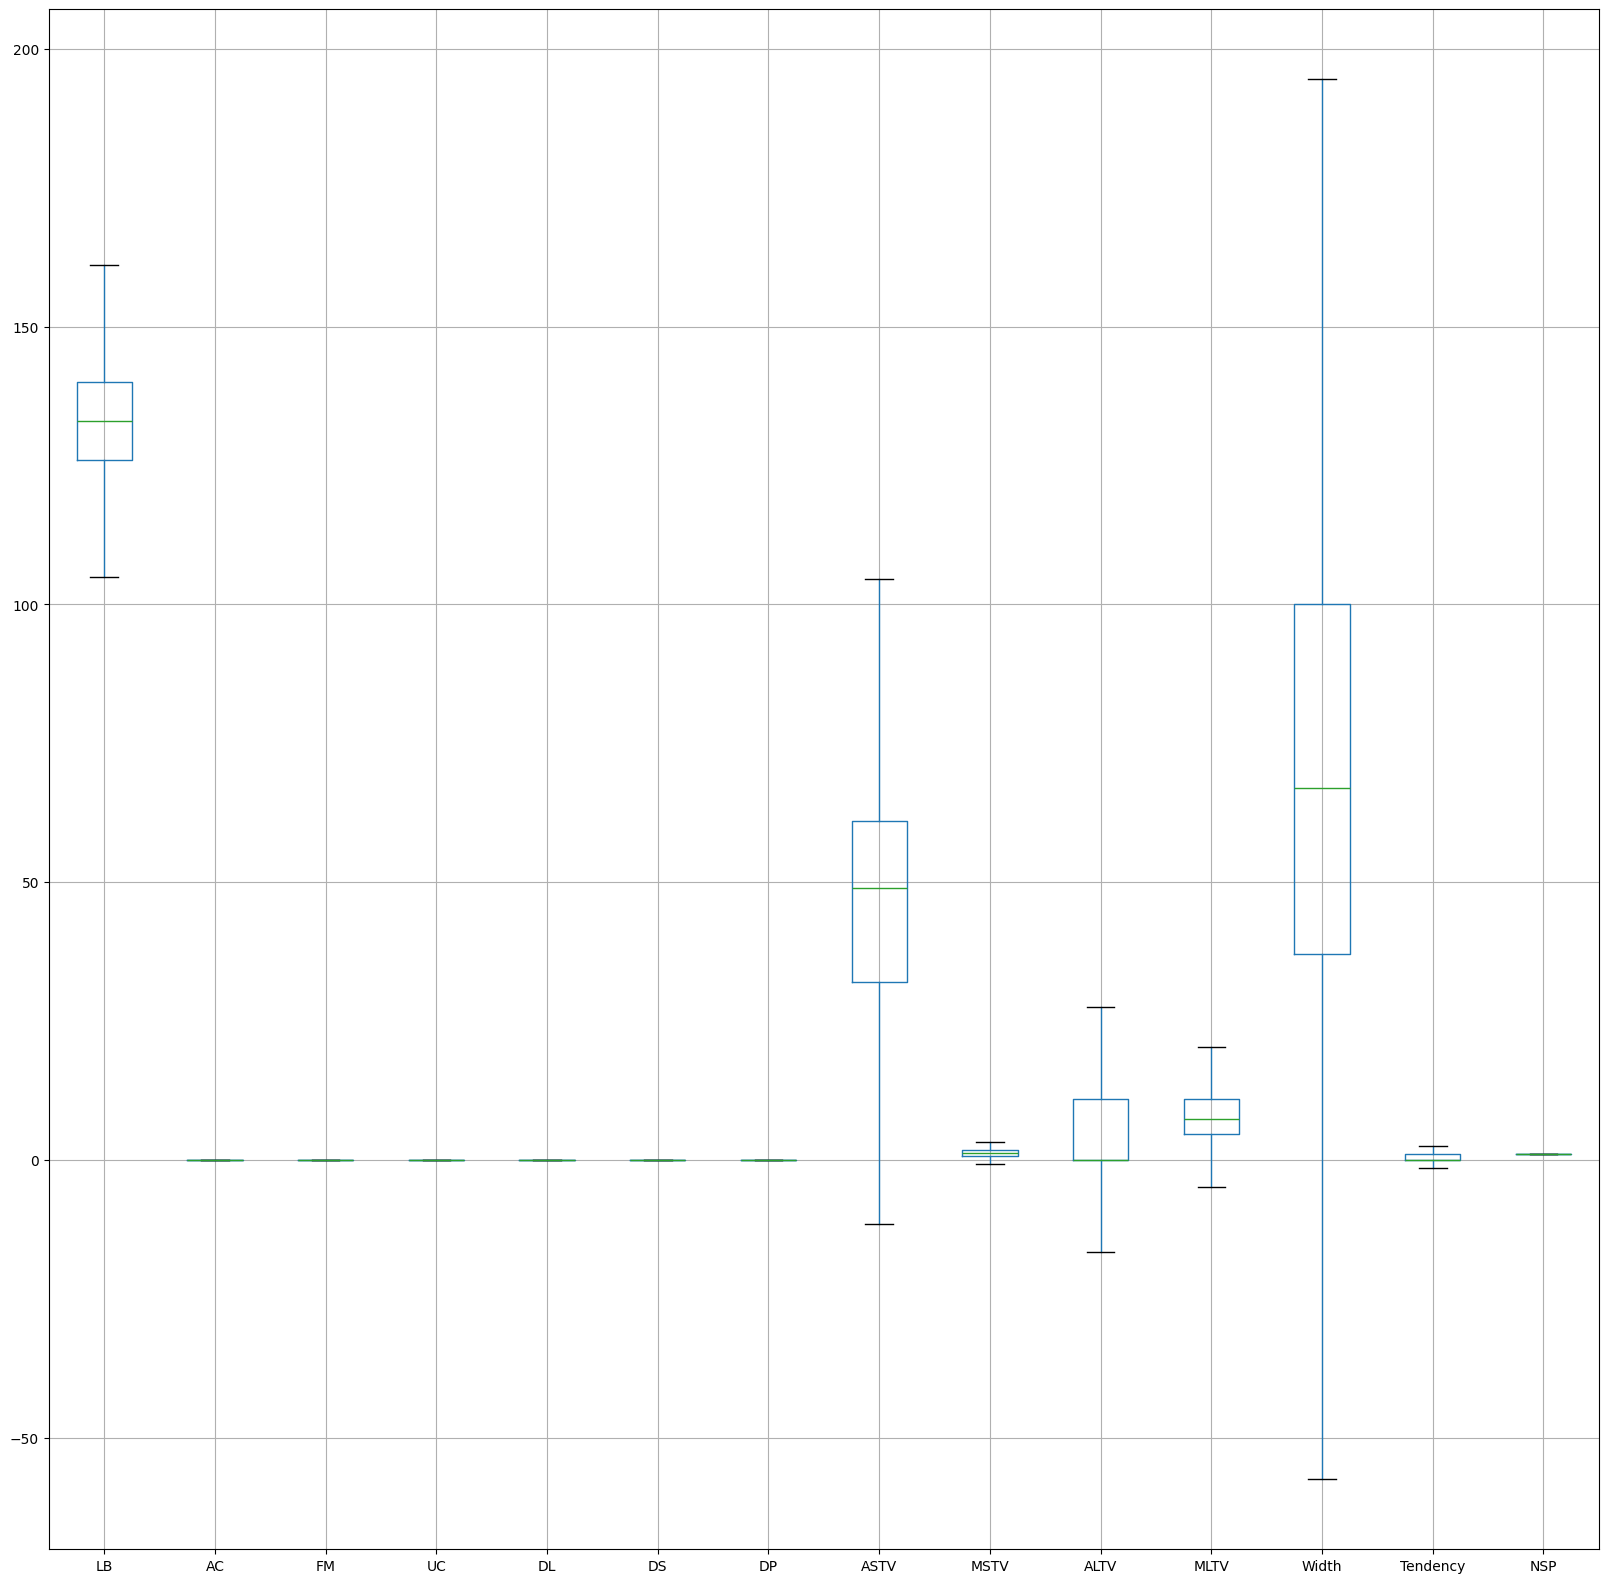

In [66]:
df1.boxplot(figsize=(20,20))

This is showing boxplot of all columns

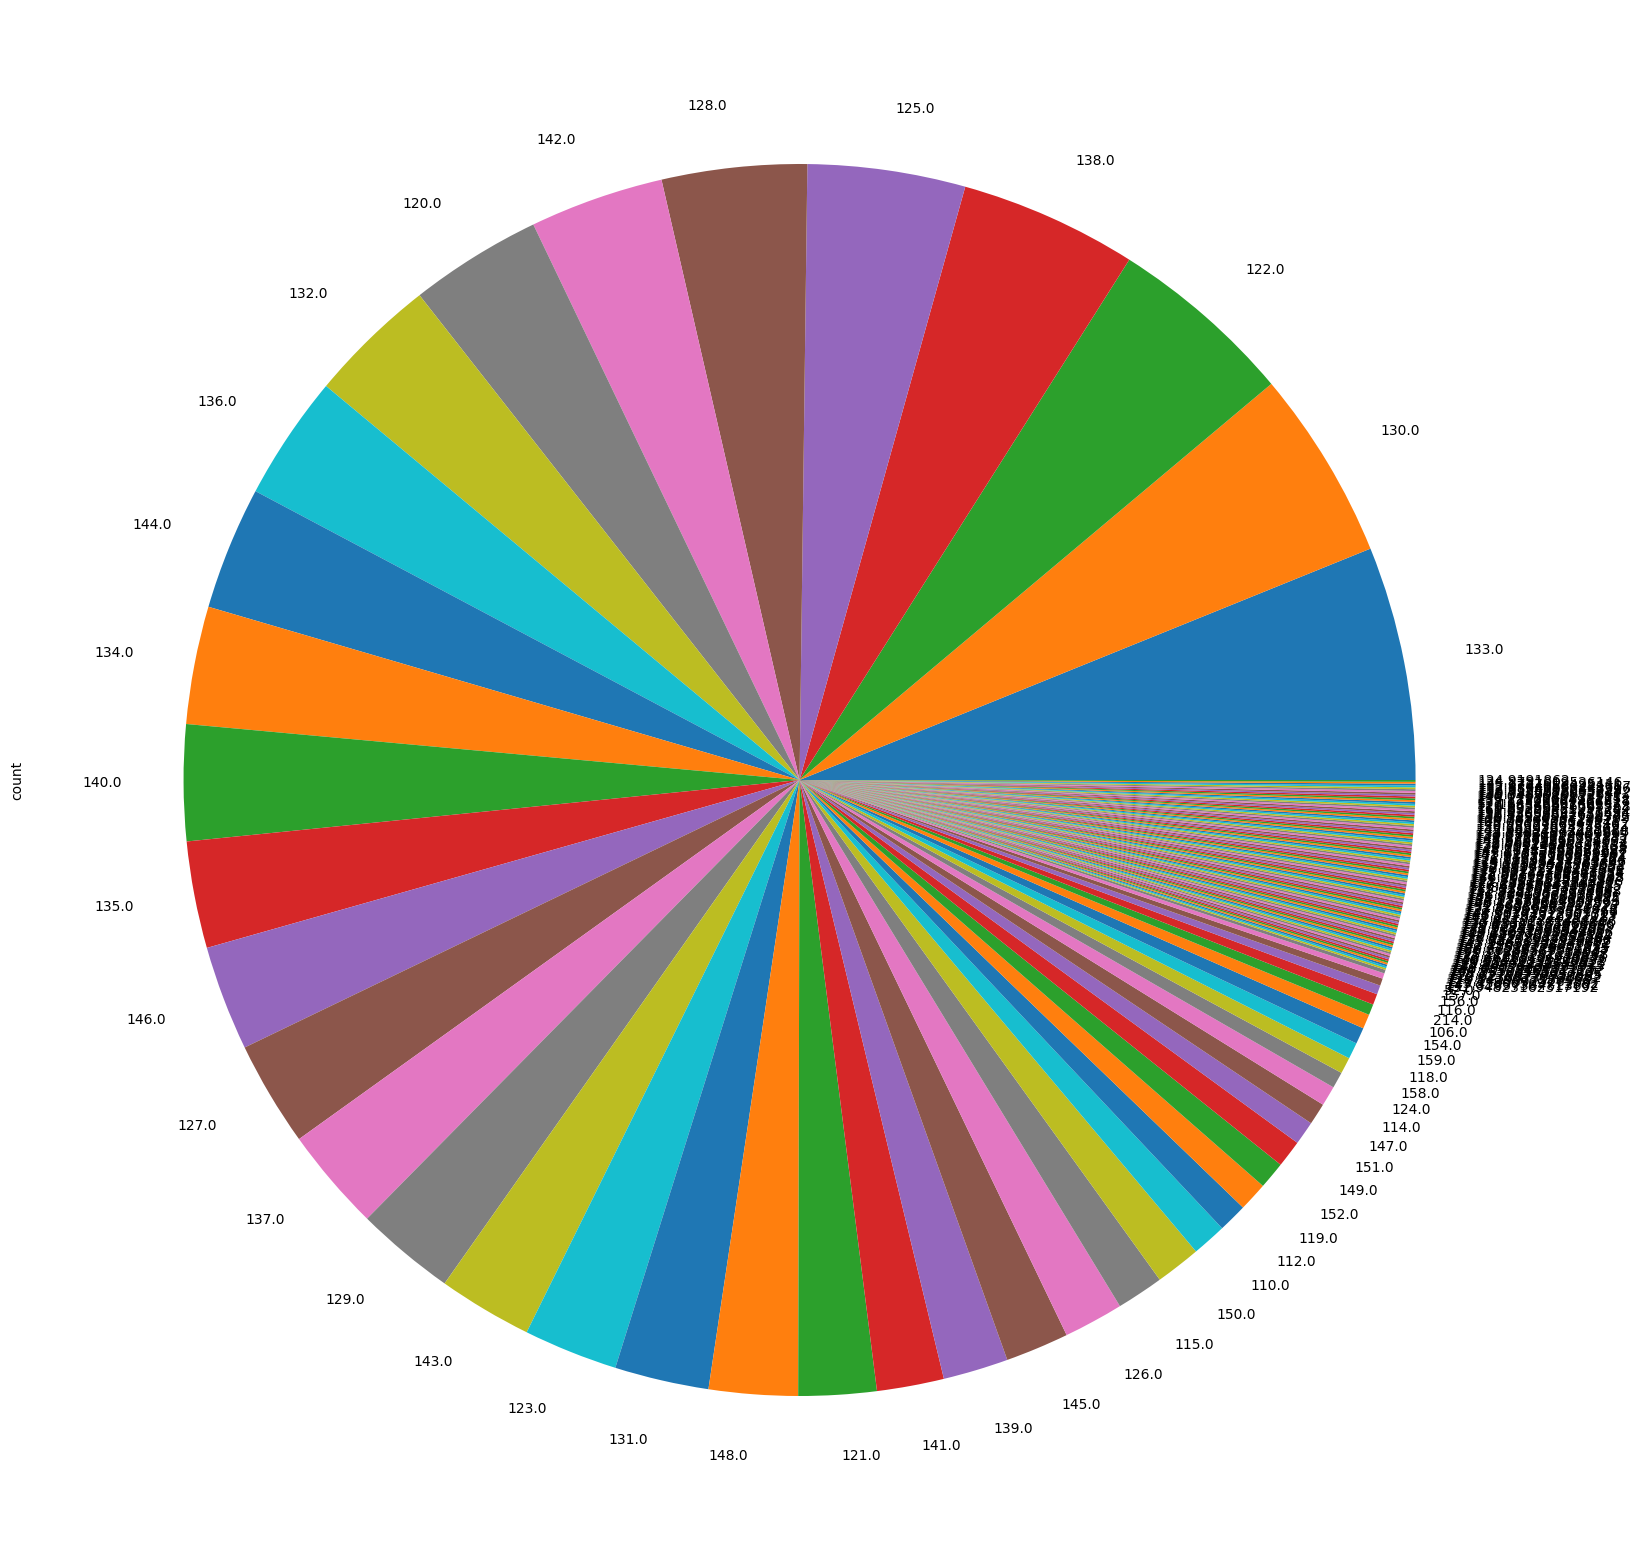

In [21]:
import matplotlib.pyplot as plt
counts=df['LB'].value_counts()
counts.plot(kind='pie',figsize=(20,20))
plt.show()

This is showing Pie plot of LB column


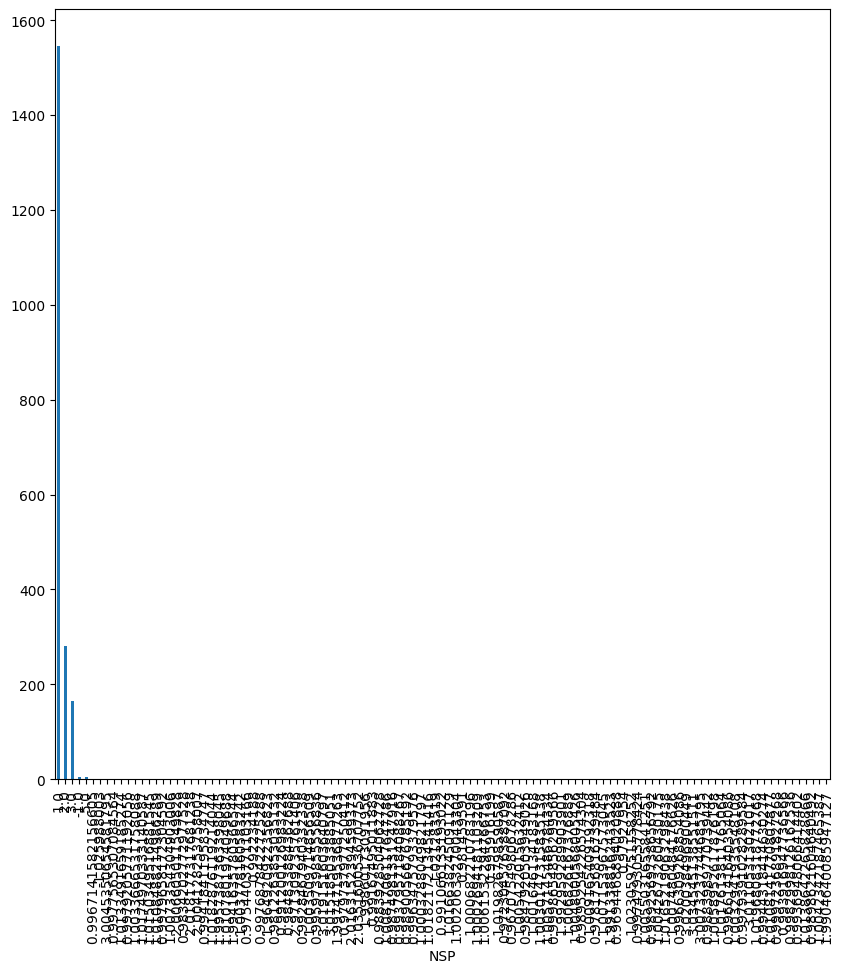

In [ ]:

counts=df['NSP'].value_counts()
counts.plot(kind='bar',figsize=(10,10))
plt.show()

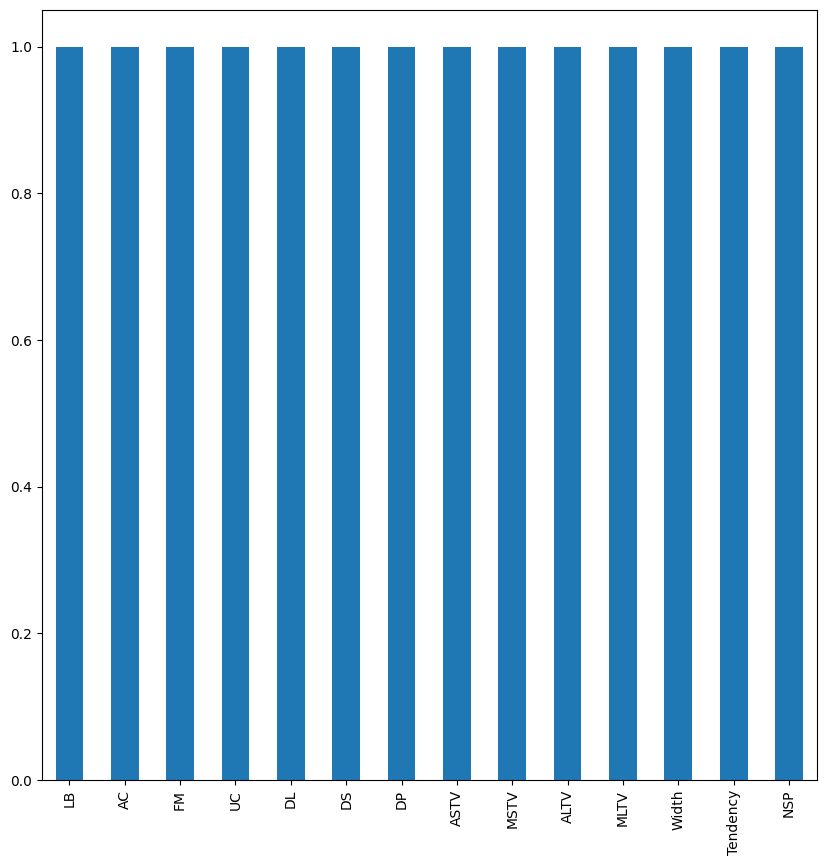

In [36]:
for i in df.columns:
    df.columns.value_counts().plot(kind='bar',figsize=(10,10))

Bar Chart is for all columns

In [30]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

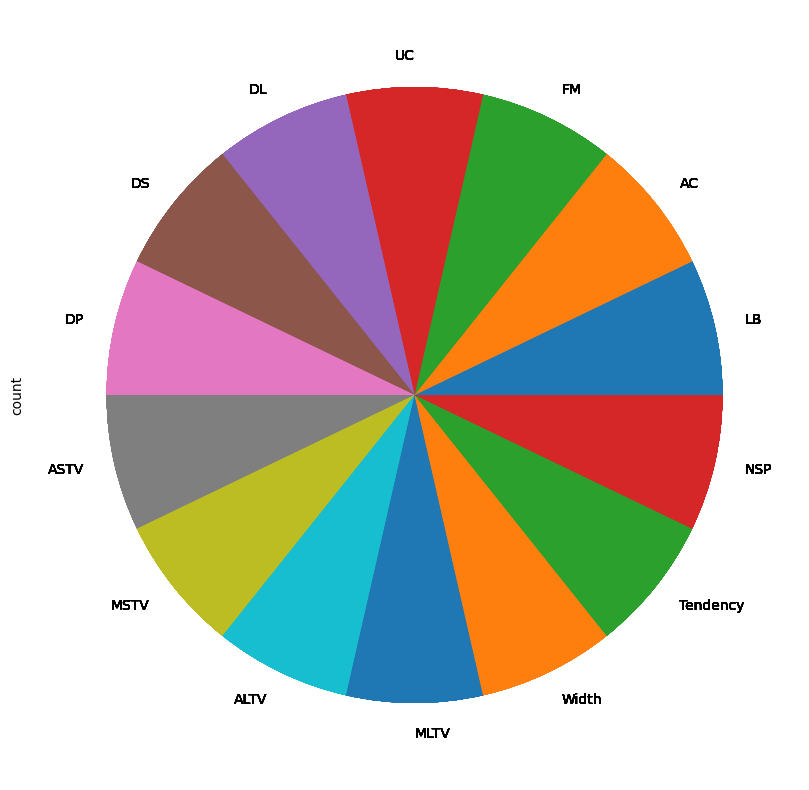

In [ ]:
for i in df.columns:
    df.columns.value_counts().plot(kind='pie',figsize=(10,10),autopct=)

Pie chart for all columns

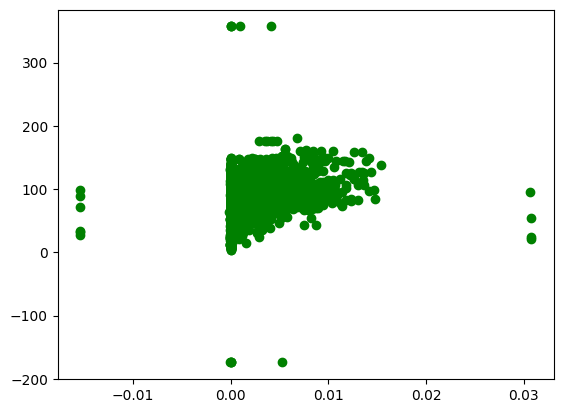

In [37]:
import matplotlib.pyplot as plt
plt.scatter(x=df['DL'],y=df['Width'],color='green')

This is showing scatterplot of DL and Width


<Axes: >

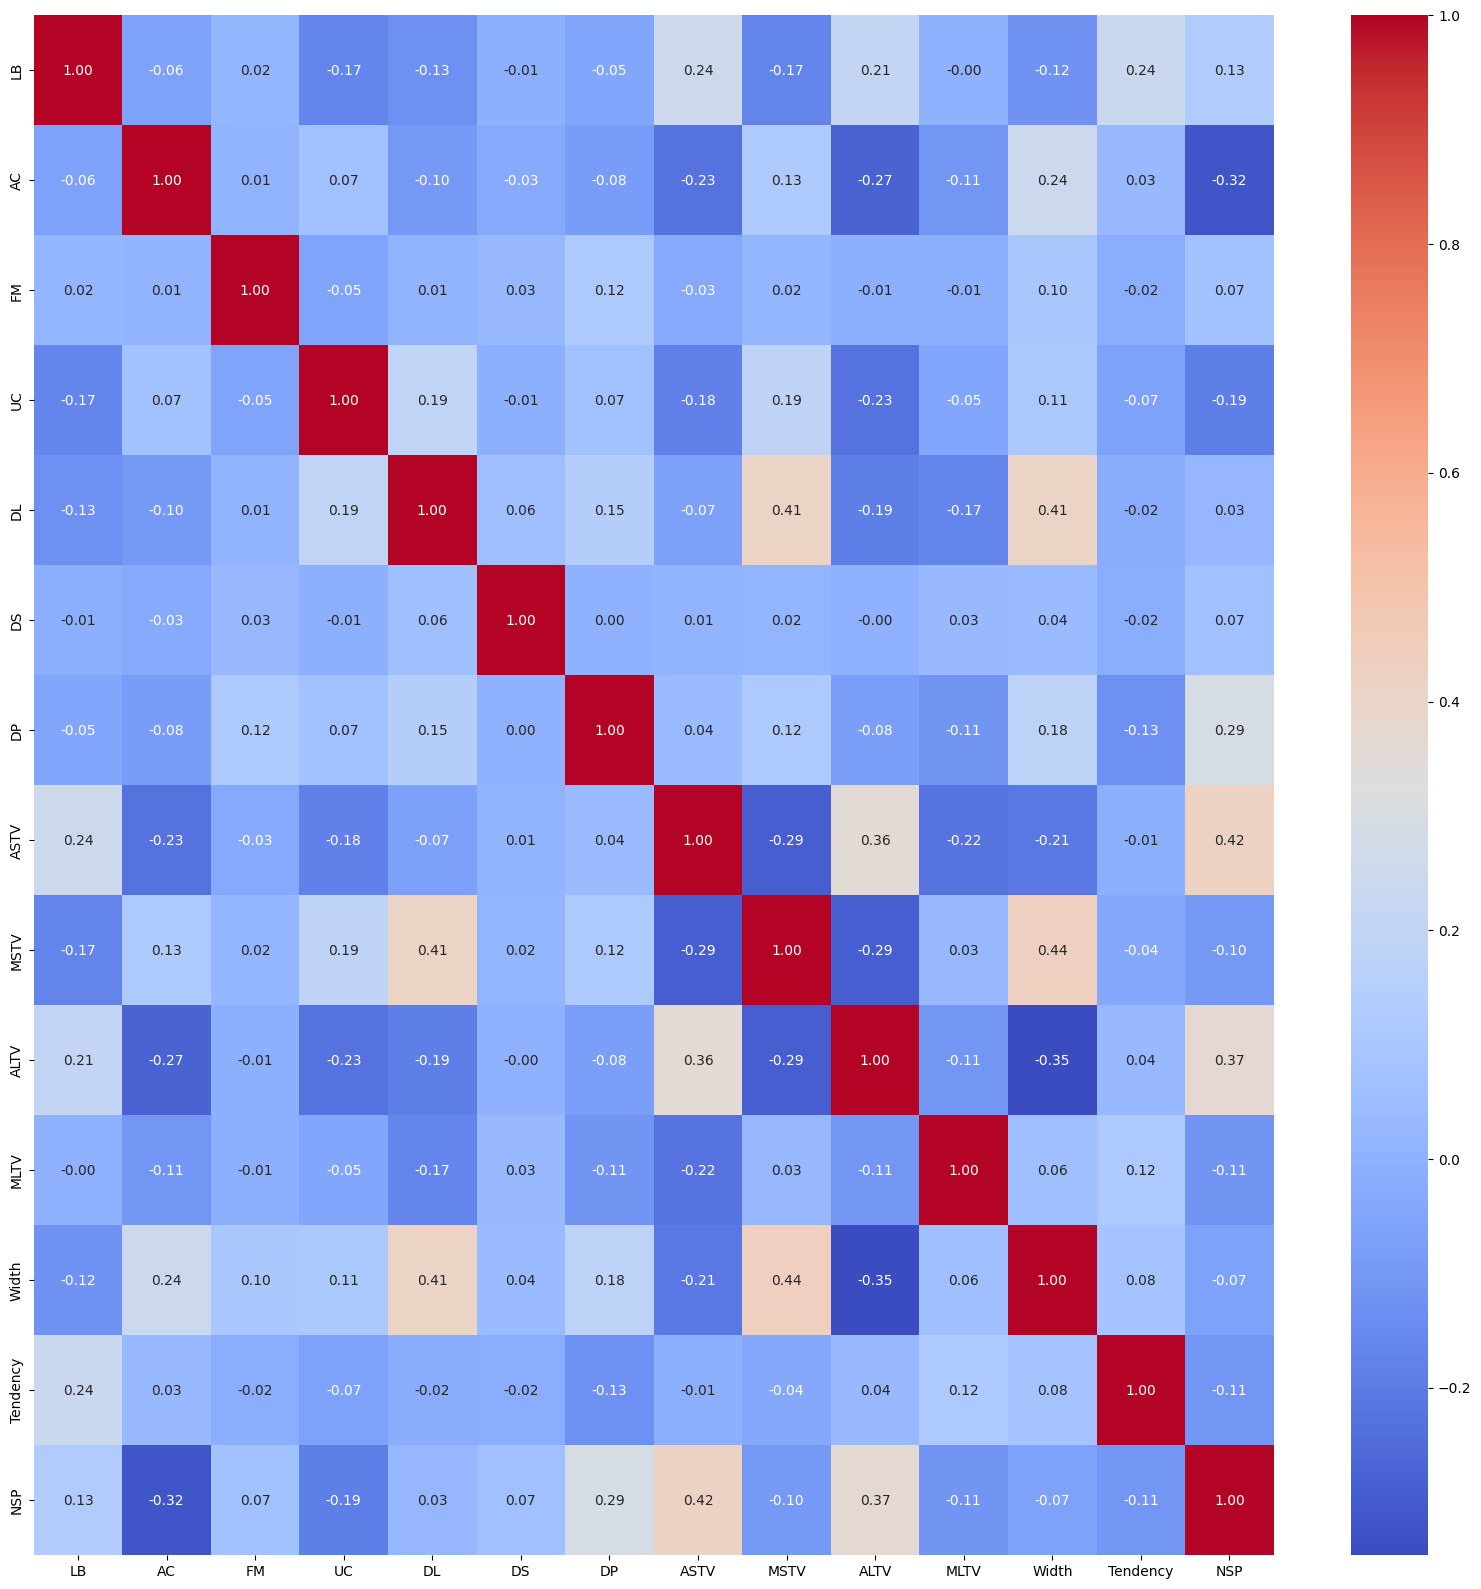

In [46]:
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')

This shows the heatmap(Correlation between variables)

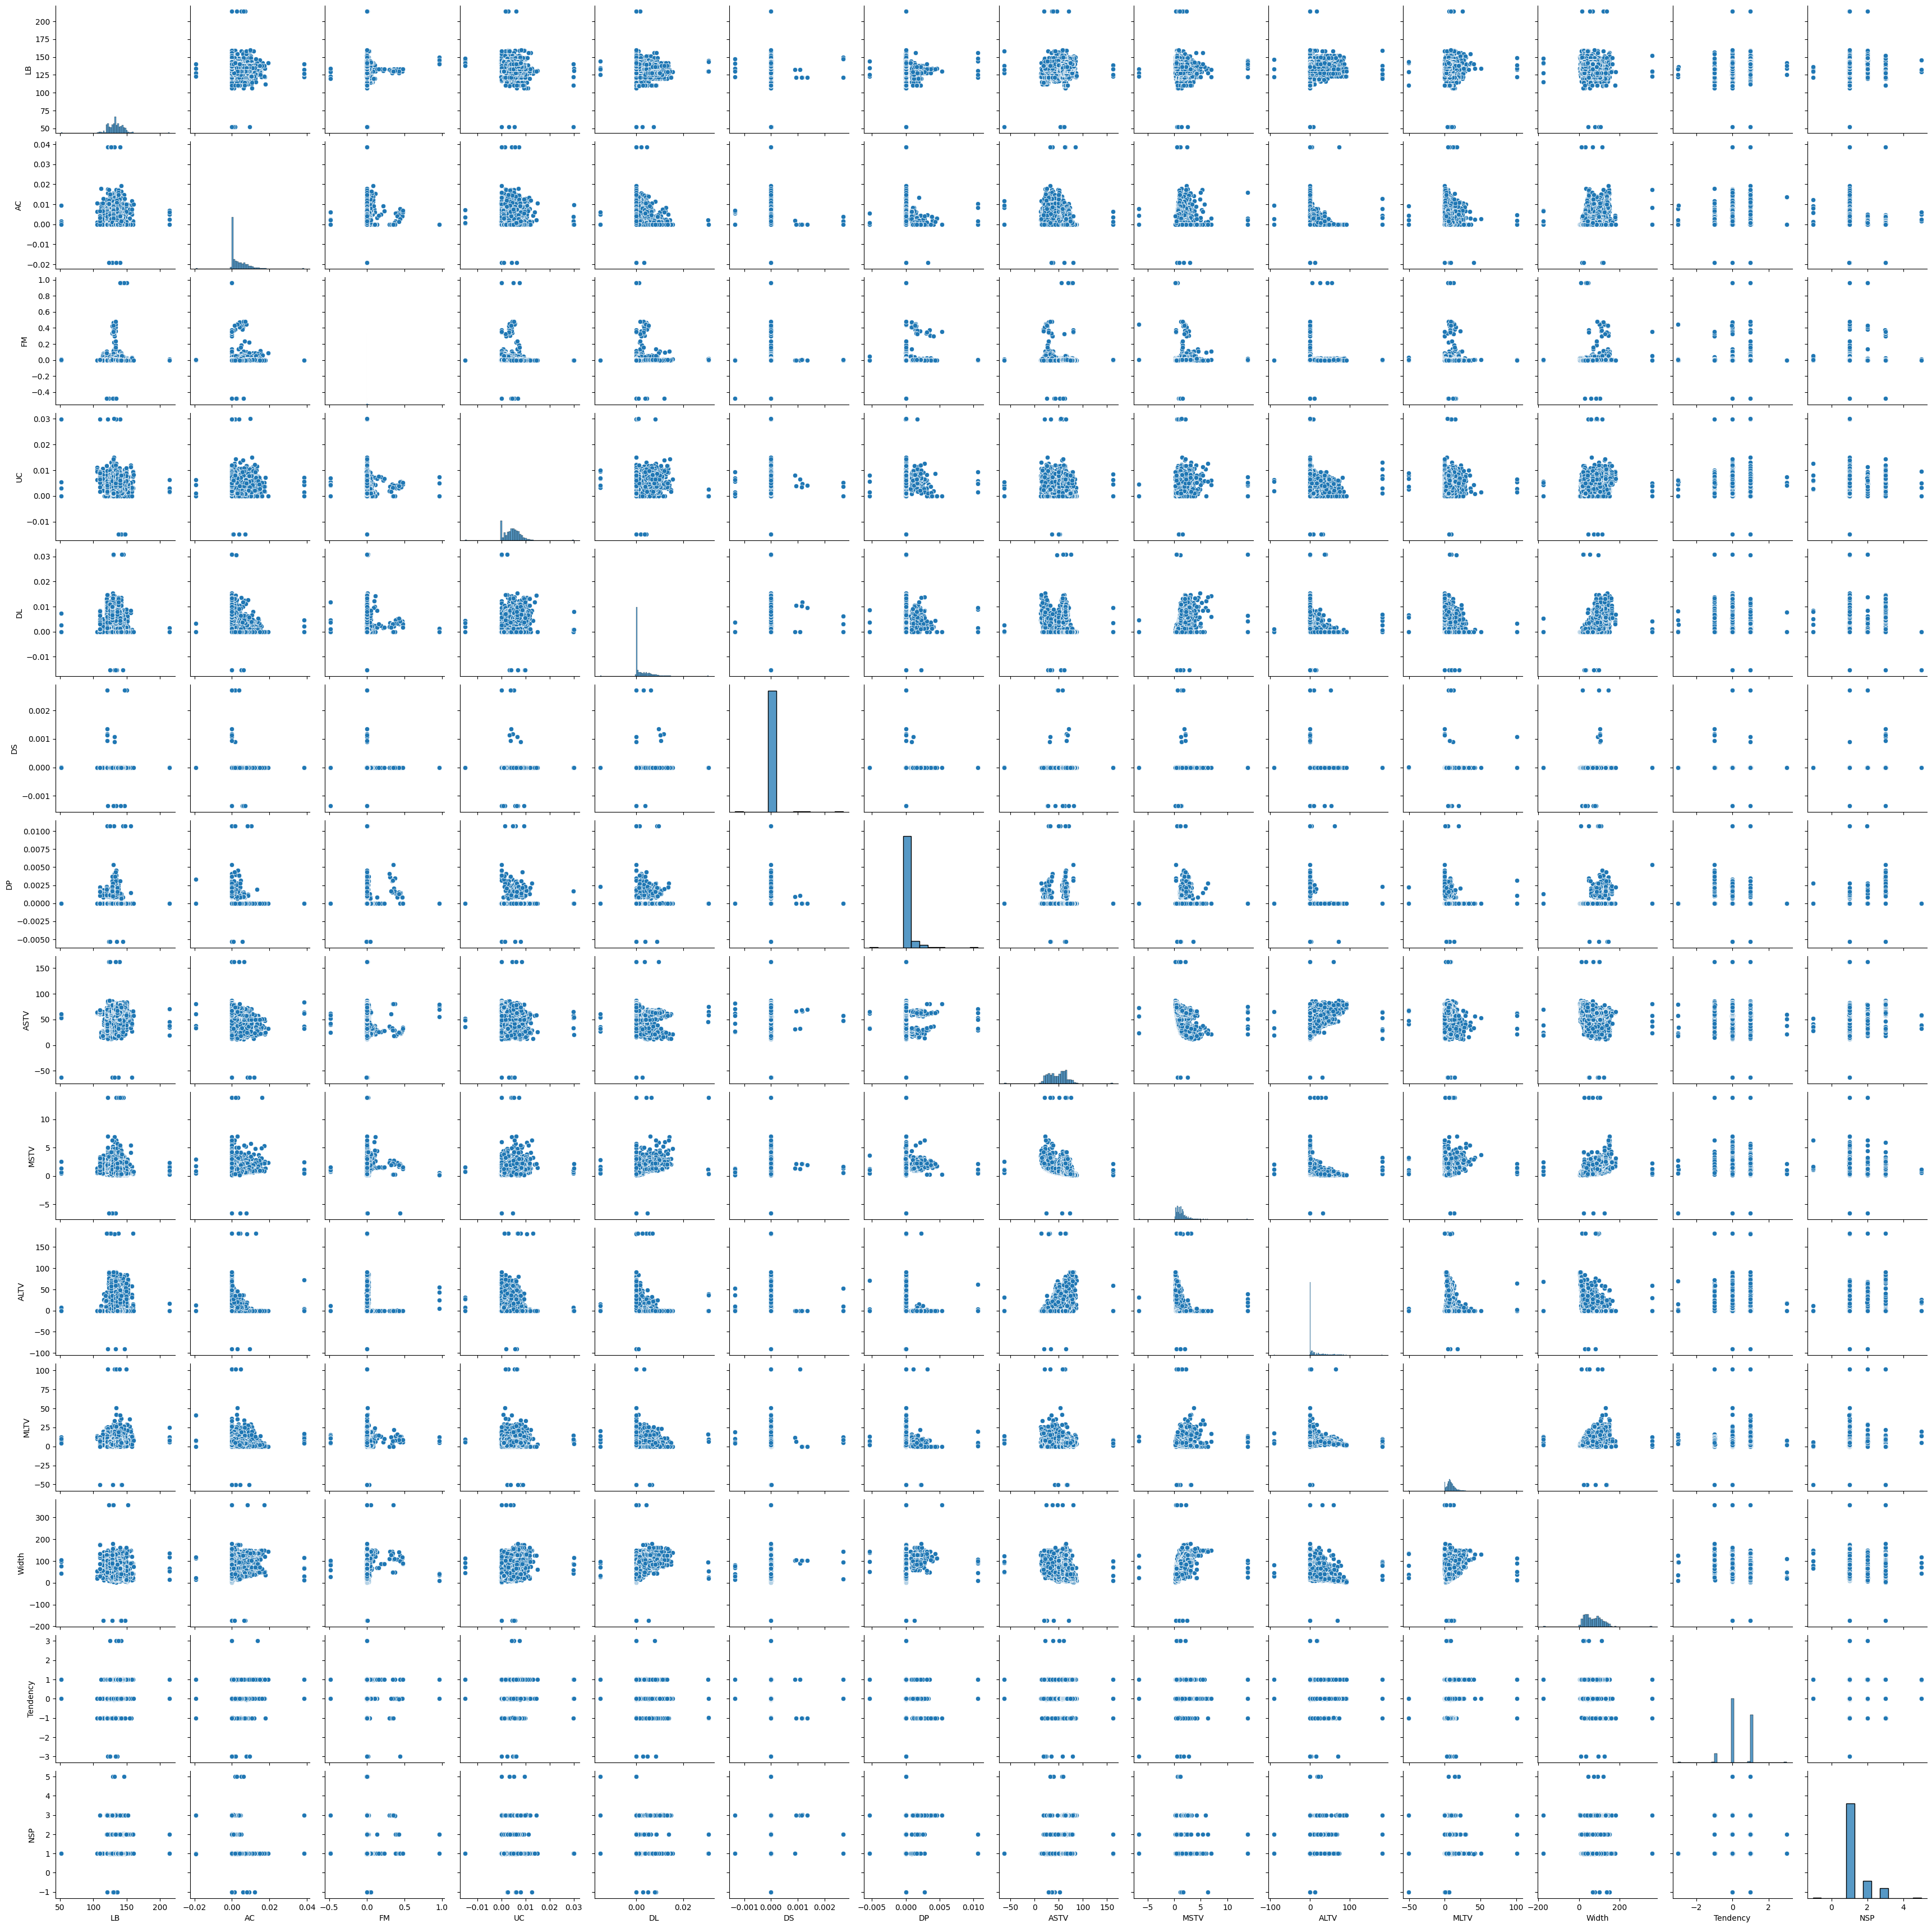

In [48]:
sns.pairplot(df)

This shows pairplots for all columns in dataset

<Axes: >

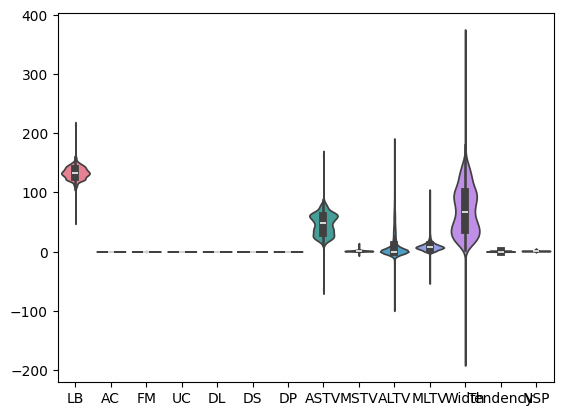

In [49]:
sns.violinplot(df)

## 4.	Pattern Recognition and Insights:

●	Identify any correlations between variables and discuss their potential implications.

●	Look for trends or patterns over time if temporal data is available.


This shows violinplots for all columns

In [51]:
corr #This shows correlation between the columns

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.063830,0.018777,-0.166570,-0.126959,-0.005438,-0.047724,0.242625,-0.170473,0.210728,-0.003457,-0.118425,0.236864,0.131843
AC,-0.063830,1.000000,0.010152,0.070135,-0.095491,-0.033623,-0.084590,-0.230487,0.126752,-0.273890,-0.106529,0.238436,0.032481,-0.316941
FM,0.018777,0.010152,1.000000,-0.052979,0.009830,0.029901,0.121284,-0.032783,0.017481,-0.012276,-0.006237,0.097213,-0.018339,0.074054
UC,-0.166570,0.070135,-0.052979,1.000000,0.191864,-0.006937,0.070658,-0.181133,0.190011,-0.227817,-0.049460,0.107397,-0.066610,-0.185411
DL,-0.126959,-0.095491,0.009830,0.191864,1.000000,0.058625,0.145425,-0.070792,0.410155,-0.186571,-0.165750,0.410031,-0.023569,0.025427
DS,-0.005438,-0.033623,0.029901,-0.006937,0.058625,1.000000,0.004285,0.008452,0.016163,-0.004398,0.034349,0.040832,-0.015398,0.065400
DP,-0.047724,-0.084590,0.121284,0.070658,0.145425,0.004285,1.000000,0.038238,0.119892,-0.077758,-0.114084,0.175340,-0.130395,0.294472
ASTV,0.242625,-0.230487,-0.032783,-0.181133,-0.070792,0.008452,0.038238,1.000000,-0.293388,0.357668,-0.220427,-0.207599,-0.010927,0.422652
MSTV,-0.170473,0.126752,0.017481,0.190011,0.410155,0.016163,0.119892,-0.293388,1.000000,-0.291362,0.028934,0.435393,-0.036857,-0.095139
ALTV,0.210728,-0.273890,-0.012276,-0.227817,-0.186571,-0.004398,-0.077758,0.357668,-0.291362,1.000000,-0.107712,-0.346460,0.036771,0.365846


In Correlation concept 

value close to 1 shows positive correlation(Means for example if there are two columns A and B ,if value of A increases value of B also increases)

value close to -1 shows negative correlation(Means for example if there are two columns A and B ,if value of A increases value of B also decreases)

value close to 0 means there is no relation between that two columns


Here in given dataset AC and NSP has -0.32(Strong negative correlation),MSTV and ASTV has -0.29 and  Width and ALTV has -0.34 that means that three has strong negative correlation

Here strong positive correlation is ASTV & NSP (0.42), ALTV & NSP (0.36), Width & MSTV (0.44), DL & MSTV (0.41) & DL & Width (0.41)

Here ASTV, ALTV, NSP, Width, MSTV, DL shows moderate correlation that means close to 0, hence they have slightly zero correlation

There is no Temporal data(Date and Time) is available in dataset so, we can't look for treands and patterns over time

## 5.	Conclusion:

●	Summarize the key insights and patterns discovered through your exploratory analysis.

●	Discuss how these findings could impact decision-making or further analyses.


Key insights and Patterns discovered is

1. Data must be cleaned means we have to remove missing values from the data for better performance.

2. We can Identify outliers(upper extreme values and lower extreme values that affect the data in outputs and it gives inconsistencies in data) and we can remove that outliers for better performance of data.

3. We can summarize the data and find interesting terms like how minimum values and maximum values in data matters and which columns have constant values what is the use of it

4. We created Histograms, Boxplots, Barcharts, Scatterplots, violinplots, heatmaps for better visualization of data

5. We identified correlations between the columns in data which column is dependent on others we can find that throug heatmaps or through df.corr


How these findings could impact decision-making or further analysis

These findings helps us to know about predictions,regressions and classifications of data and we can easily analyse the data and use that for pattern identification this helps to further analysis in future